## Task #2- Prediction using Supervised Machine Learning

### Question: Predict the percentage of marks of a student based on the number of study hours 

Task: Use Linear Regression to predict the percentage of marks of a student based on his number of study hours.

Dataset: Data consists of no of hours of study and scores of students in percentage.

Dataset can be found here: http://bit.ly/w-data

## Importing libraries

In [1]:
# Import all the libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data into pandas dataframe
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
# check head of dataframe
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# view summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Study relationship between 2 quantities

Text(0.5, 1.0, 'Scores vs Hours')

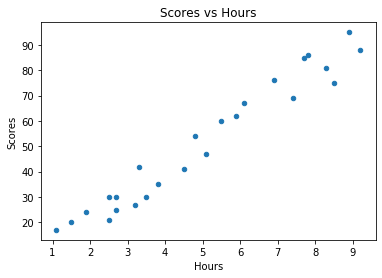

In [5]:
# plot Scores vs Study Hours graph to study relationship between the 2 
df.plot(x ='Hours', y ='Scores', kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores vs Hours')

Above plot shows that there is positive linear relation between Percentage of scores and Study Hours.

## Preparing the data

In [6]:
# Divide data into input(independent variable) and output(dependent variable)
X = df.iloc[:, :1].values  
y = df.iloc[:, 1].values

In [7]:
X.reshape(1,-1)

array([[2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
        3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]])

In [8]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [9]:
# print shape of X and y
print('Shape of X: ' + str(X.shape))
print('Shape of y: ' + str(y.shape))

Shape of X: (25, 1)
Shape of y: (25,)


In [10]:
# Split the data into testing and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
print("Training data: ")
print('Hours = ' + str(X_train.reshape(1,-1)))
print('Percentage Score = ' + str(y_train))
print()
print("Test data: ")
print('Hours = ' + str(X_test.reshape(1,-1)))
print('Percentage Score = ' + str(y_test))

Training data: 
Hours = [[3.8 1.9 7.8 6.9 1.1 5.1 7.7 3.3 8.3 9.2 6.1 3.5 2.7 5.5 2.7 8.5 2.5 4.8
  8.9 4.5]]
Percentage Score = [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]

Test data: 
Hours = [[1.5 3.2 7.4 2.5 5.9]]
Percentage Score = [20 27 69 30 62]


## Training the model

Using scikit-learn's built-in LinearRegression model

In [12]:
# train the linear regression model with training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print('Training of model complete')

Training of model complete


## Visualising Regression line generated by model

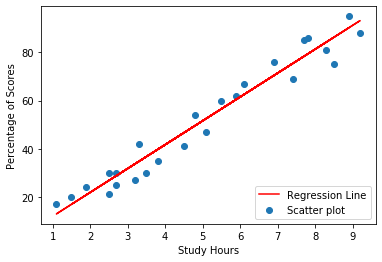

In [13]:
# regression line in form y=mx+c
line = model.coef_ * X + model.intercept_

# Plotting for the test data
plt.scatter(X, y, label='Scatter plot')
plt.plot(X, line, label='Regression Line', color='red');
plt.xlabel('Study Hours')
plt.ylabel('Percentage of Scores')
plt.legend(loc=4)

## Making Predictions

In [14]:
# make predictions with test set
predictions = model.predict(X_test)

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted':predictions})  
df.head(5)

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evaluating the model

In [16]:
from sklearn import metrics

In [17]:
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_test, predictions))
print('Mean Absolute Error (MSE): ', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error (MAE):  4.183859899002975
Mean Absolute Error (MSE):  21.5987693072174
Root Mean Squared Error (RMSE):  4.6474476121003665


## Predict Percentage score 

Q) What will be predicted score if a student studies for 9.25 hrs/ day? 

In [18]:
hours = [[9.25]]
prediction = model.predict(hours)

In [19]:
print('If a student studies for 9.25 hours then his predicted is', + prediction[0])

If a student studies for 9.25 hours then his predicted is 93.69173248737538
